# Assignment 2: Naive Bayes and Text Classification

Only use the already imported library `numpy`. Make sure that the `liar.txt` dataset is in the same directory as the notebook.

List your team members (name and immatriculation number) in the following cell:

* name: Abdul Rehman
* *matr. nr.* 3440146
* *study program* M.Sc. INFOTECH
* M.Sc

* name: Jugal Yadav
* *matr. nr.* 3510720
* *study program* M.Sc. Computer Science
* M.Sc

* name: Suganth Natarajan
* *matr. nr.* 3440146
* *study program* M.Sc. Autonome Systeme
* M.Sc

In [110]:
# Load required packages and dataset. Do not modify.
import numpy as np


def load_liar_dataset():
    import string
    
    with open('liar.txt', mode='r', encoding='utf-8') as f:
        rows = [l.strip().split('\t')[:2] for l in f]
    
    y, X = zip(*rows)
    X =[x.translate(str.maketrans('', '', string.punctuation)).lower().split() for x in X]
    
    return X, y
    

X, y = load_liar_dataset()

print('Sample:')
print(f'{y[0]}: {X[0]}')
print(f'{y[2]}: {X[2]}')


Sample:
real: ['thanks', 'to', 'our', 'reforms', 'the', 'average', 'family', 'will', 'have', 'an', 'extra', '322', 'to', 'spend']
real: ['winning', 'enough', 'pledged', 'delegates', 'is', 'not', 'impossible']


## Task 2: Fake News Classification with Naive Bayes

Implement a Naive Bayes classifier with Laplace smoothing to detect whether a text message is fake or real (not fake).

A text message is represented by a list of string tokens as shown above.
The classification target is binary and the two possible labels are the strings `'fake'` and `'real'`.

Fill out the methods in `NaiveBayesFakeNewsClassifier` to train (`fit`) and predict (`predict`). Feel free to introduce new fields and methods based on your needs, but the methods `fit` and `predict` are required and their interface should not be changed.

Hint: Try to map the text messages to word frequency vectors by counting how often each word occurs in a message.

In [116]:
# Implement your solution here.
class NaiveBayesFakeNewsClassifier(object):
    
    frequency_fake_terms = dict()
    frequency_real_terms = dict()
    
    def __init__(self):
        pass
    
    def fit(self, X, y):
        """
        X is a list of `n` text messages. Each text message is a list of strings with at least length one.
        y is a list of `n` labels either the string 'fake' or the string 'real'.
        """
       
        frequency_fake_terms = self.frequency_fake_terms
        frequency_real_terms = self.frequency_real_terms
        # looping through every message in X and every words in message
        for message in range(len(X)): 
            for text in range(len(X[message])): 
                if y[message] == 'fake' and X[message][text] not in frequency_fake_terms.keys():
                    frequency_fake_terms[X[message][text]] = 1
                elif y[message] == 'fake':
                    frequency_fake_terms[X[message][text]] += 1
                elif y[message] == 'real' and X[message][text] not in frequency_real_terms.keys():
                    frequency_real_terms[X[message][text]] = 1
                elif y[message] == 'real':
                    frequency_real_terms[X[message][text]] += 1

        self.frequency_fake_terms = frequency_fake_terms
        self.frequency_real_terms = frequency_real_terms
        
    
    def predict(self, X):
        """
        X is a list of `n` text messages. Each text message is a list of strings with at least length one.
        The method returns a list of `n` strings, i.e. classification labels ('fake' or 'real').
        """
       
        fake_words = set(self.frequency_fake_terms.keys())
        real_words = set(self.frequency_real_terms.keys())
       
        common_intersection = fake_words & real_words
        predicted = []
        unique_terms = len(self.frequency_fake_terms) + len(self.frequency_real_terms) - len(common_intersection)
      
        for i in range(len(X)):
            prob_real = 1
            prob_fake = 1
            for j in range(len(X[i])):
                fake_word = self.frequency_fake_terms.get(X[i][j])
                #print(fake_word)
                if fake_word:
                    prob_fake *= (self.frequency_fake_terms[X[i][j]] + 1) / (len(self.frequency_fake_terms) + unique_terms)
                elif not fake_word:
                    prob_fake *= (0 + 1) / (len(self.frequency_fake_terms) + unique_terms)
                real_word = self.frequency_real_terms.get(X[i][j])
                if real_word:
                    prob_real *= (self.frequency_real_terms[X[i][j]] + 1) / (len(self.frequency_real_terms) + unique_terms)
                elif not real_word:
                    prob_real *= (0 + 1) / (len(self.frequency_real_terms) + unique_terms)
            if prob_real >=  prob_fake:
                predicted.append('real')
            else:
                predicted.append('fake')
        
        
        return predicted

<ipython-input-119-f246301549d2>:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['', 'real', 'fake'])
<ipython-input-119-f246301549d2>:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['', 'real', 'fake'])


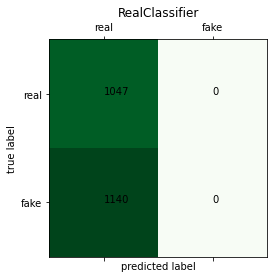

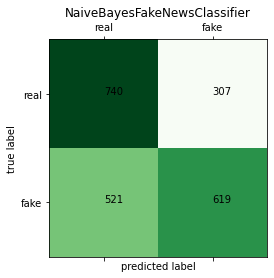

In [119]:
# The following code will evaluate your classifier.
class RealClassifier(object):
    """
    This classifier is a primitive baseline, which just predicts the most common class each time.
    Naive Bayes should definitely beat this.
    """
    def fit(self, X, y): pass
    def predict(self, X): return len(X)*['real']

    
def train_evaluate(classifier, X, y):
    from sklearn.metrics import confusion_matrix
    from sklearn.model_selection import train_test_split
    
    # Apply train-test split.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2020)
    # Inititialize and train classifier.
    classifier.fit(X_train, y_train)
    # Evaluate classifier on test data.
    yhat_test = classifier.predict(X_test)
    cmatrix = confusion_matrix(y_test, yhat_test, labels=['real', 'fake'])
    
    return cmatrix


def plot_confusion_matrix(cmatrix, classifier_name):
    import matplotlib.pyplot as plt
    
    fig, ax = plt.subplots(1, 1)
    ax.matshow(cmatrix, cmap='Greens')
    for x in (0, 1):
        for y in (0, 1):
            ax.text(x, y, cmatrix[y, x])
    ax.set_xlabel('predicted label')
    ax.set_ylabel('true label')
    ax.set_xticklabels(['', 'real', 'fake'])
    ax.set_yticklabels(['', 'real', 'fake'])
    ax.set_title(classifier_name)

    
    
real_classifier = RealClassifier()
your_classifier = NaiveBayesFakeNewsClassifier()
real_cmatrix = train_evaluate(real_classifier, X, y)
your_cmatrix = train_evaluate(your_classifier, X, y)

plot_confusion_matrix(real_cmatrix, 'RealClassifier')
plot_confusion_matrix(your_cmatrix, 'NaiveBayesFakeNewsClassifier')